In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image
import os
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
model=load_model('./custom_model.h5')
BATCH_SIZE = 32
IMAGE_SIZE = (224,224)
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [5]:
v_datagen = ImageDataGenerator(rescale=1. / 255)
v_generator = v_datagen.flow_from_directory("./processed_data/val",
                                                   target_size=IMAGE_SIZE,
                                                   batch_size=1,
                                                  color_mode="rgb",
                                                  shuffle=False,
                                                   class_mode='categorical')
v_generator.reset()
x = model.evaluate_generator(v_generator,
 steps = np.ceil(len(v_generator) / BATCH_SIZE),
 use_multiprocessing = False,
 verbose = 1,
 workers=1
 )
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 720 images belonging to 3 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
23/23 [==============================] - 1s 24ms/step - loss: 0.0511 - accuracy: 1.0000
Test loss: 0.05110799893736839
Test accuracy: 1.0


In [6]:



results = model.predict(v_generator)
results = np.argmax(results,axis=1)
results = results.tolist()



k=0
true_val = []
class_loc = './processed_data/val/'
for i in os.listdir(class_loc):
    images_loc = class_loc + i
    for j in os.listdir(images_loc):
        true_val.append(k)
    k+=1

    

print(accuracy_score(true_val, results),"\n")
report = classification_report(true_val, results)
print(report)

0.9277777777777778 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       240
           1       0.93      0.90      0.91       240
           2       0.88      0.91      0.90       240

    accuracy                           0.93       720
   macro avg       0.93      0.93      0.93       720
weighted avg       0.93      0.93      0.93       720



In [3]:
import tensorflow as tf
k=0
true_val = []
pred_val = []
files = []
class_loc = './processed_data/val/'
for i in os.listdir(class_loc):
    images_loc = class_loc + i
    for j in os.listdir(images_loc):
        img_path = images_loc + '/' + j
        image = tf.keras.preprocessing.image.load_img(img_path, grayscale=False, color_mode="rgb", target_size=IMAGE_SIZE)
        input_arr = tf.keras.preprocessing.image.img_to_array(image)
        input_arr = (1./255)*input_arr
        input_arr = np.array([input_arr])  # Convert single image to a batch.
        predictions = model.predict(input_arr)
        predictions = np.argmax(predictions,axis=1)[0]
        pred_val.append(round(predictions))
        true_val.append(k)
    k+=1
print('Accuracy:',accuracy_score(true_val, pred_val),"\n")
report = classification_report(true_val, pred_val)
print(report)


Accuracy: 0.9277777777777778 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       240
           1       0.93      0.90      0.91       240
           2       0.88      0.91      0.90       240

    accuracy                           0.93       720
   macro avg       0.93      0.93      0.93       720
weighted avg       0.93      0.93      0.93       720



In [4]:
path = './test/Normal/cdnormal4_patient146_SR_2_IM00022.png'

In [4]:
import tensorflow as tf
image = tf.keras.preprocessing.image.load_img(path, grayscale=False, color_mode="rgb", target_size=IMAGE_SIZE)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

In [7]:
np.argmax(predictions,axis=1)[0]

0

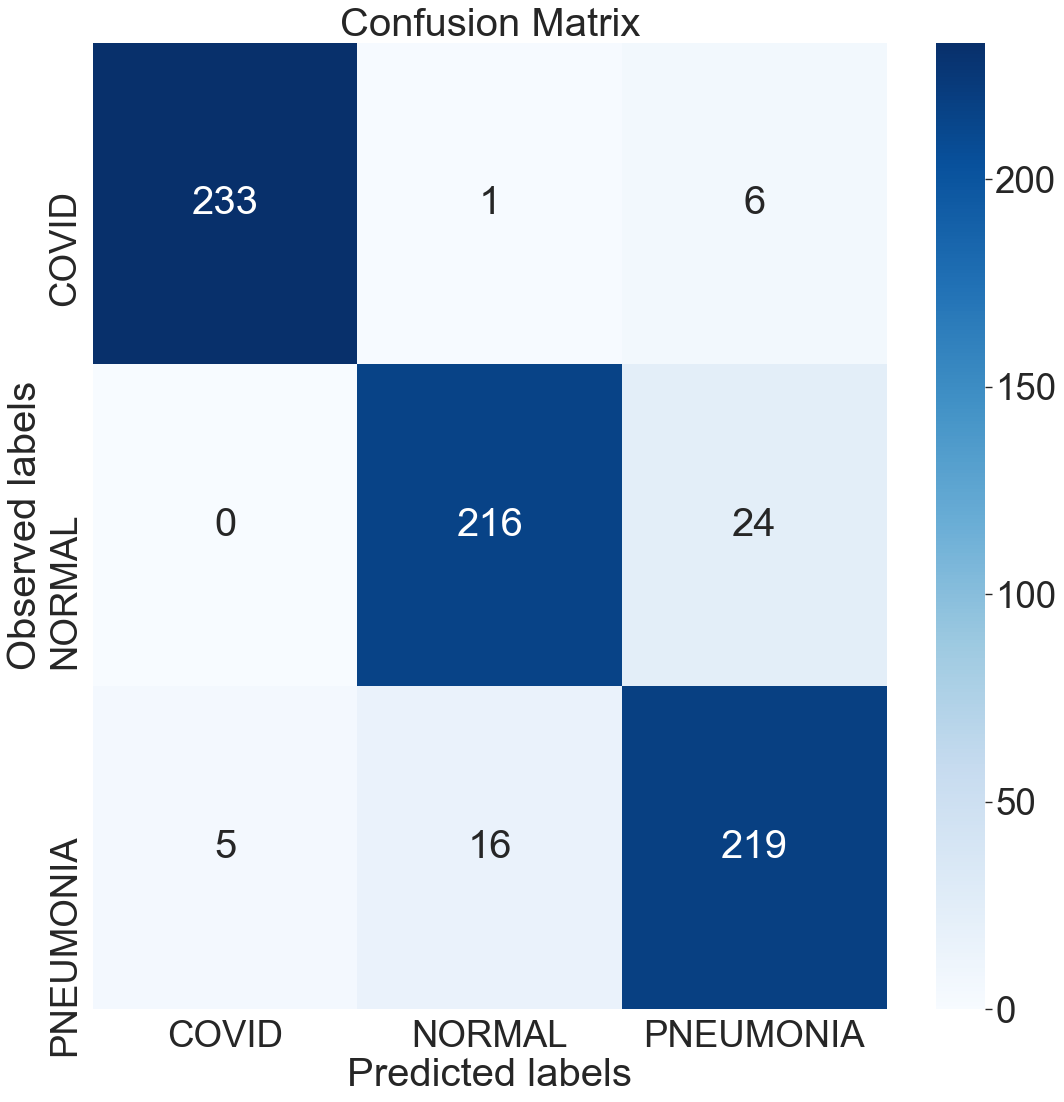

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(16,16), dpi=80)
cm = confusion_matrix(true_val,pred_val)
ax = plt.subplot()
sns.set(font_scale=3) #edited as suggested
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  # annot=True to annotate cells


# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Observed labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['COVID', 'NORMAL','PNEUMONIA']);
ax.yaxis.set_ticklabels(['COVID', 'NORMAL','PNEUMONIA']);
plt.show()